Задание 0:
Посчитать tpr и fpr в ноутбуке с лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами

In [ ]:
def calculate_tpr_and_fpr(y_true, y_pred_probas, alpha):
    tp = sum((y_pred_probas > alpha) * y_true)
    tn = sum((y_pred_probas < alpha) * (1-y_true))
    fp = sum((y_pred_probas > alpha) * (1-y_true))
    fn = sum((y_pred_probas < alpha) * y_true)
    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

Задание 1:

Возьмите файл 4. kNN digits.ipynb
В нем уже реализована загрузка датасета с рукописными цифрами
Ваша задача обучить на нем 3 модели классификации - логистическую регрессию, дерево решений и алгоритм knn
Для каждой модели вычислить метрику accuracy на тестовой выборке

In [66]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from functools import reduce
from sklearn import datasets
import pandas as pd
import numpy as np
import re

In [68]:
digits = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digits['data'], digits['target'], test_size=0.3)
models = [lr, rf, kn, dt]
results = reduce(lambda r,i: r.append({'model':re.findall(r'\.(\w+)', str(i))[-1],
                             'accuracy_manual':sum((i().fit(x_train, y_train).predict(x_test)==y_test) / y_test.shape[0]),
                             'accuracy_inbox':i().fit(x_train, y_train).score(x_test, y_test)},
                             ignore_index = True), models, pd.DataFrame(columns=['model', 'accuracy_manual', 'accuracy_inbox']))

C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default valu

In [69]:
results

,model,accuracy_manual,accuracy_inbox
0,LogisticRegression,0.951852,0.951852
1,RandomForestClassifier,0.942593,0.948148
2,KNeighborsClassifier,0.981481,0.981481
3,DecisionTreeClassifier,0.862963,0.855556


Задание 2:
Взять датасет titanic (прошлое задание)
Обучить на нем 3 модели классификации - логистическую регрессию, дерево решений и алгоритм knn
Построить график сравнения roc-кривых моделей на тестовой выборки
Вывести ROC AUC SCORE для каждой из моделей

In [70]:
data = pd.read_csv("train.csv")
drop_list = ['Name', 'Ticket', 'Cabin','PassengerId']
data.shape

# берем первую букву каюты или ставим 'N'
data['n_cabin'] = data[data.Cabin.notnull()].Cabin.str[0]
data['n_cabin'][data['n_cabin'].isnull()] = 'N'

# От имени оставляем титулы, встречающееся более чем в 0.5% записей
data['n_name'] = data.Name.apply(lambda x: (re.findall(', (\w+)',x)[0]))
data['title'] =  data.n_name.apply(lambda x :x if data[data.n_name == x].shape[0] > data.shape[0]*0.005 else 'NA')
drop_list.append('n_name')
data.title.unique()

# пропуски
data.Embarked[data.Embarked.isnull()]  = 'NA'
data.Age[data.Age.isnull()] = data.Age.mean()

# LE
le = LabelEncoder()
columns_list = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'n_cabin', 'title' ]
for i in columns_list:
    print(i, data[i].unique())
    data['n_' + i] = le.fit_transform(data[i])
    drop_list.append(i)   
    
# убираем лишние столбцы
n_data = data.drop(drop_list, axis=1)

C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' 'NA']
n_cabin ['N' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
title ['Mr' 'Mrs' 'Miss' 'Master' 'NA' 'Rev' 'Dr']


C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

                    model  accuracy  roc_auc_score
0      LogisticRegression  0.805970       0.777911
1  RandomForestClassifier  0.817164       0.791837
2    KNeighborsClassifier  0.705224       0.672569
3  DecisionTreeClassifier  0.772388       0.759664


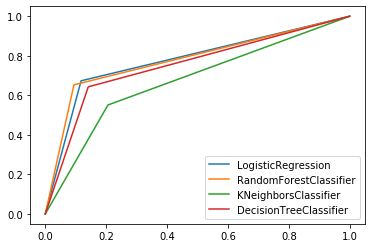

In [130]:
x = n_data.drop('Survived', axis = 1)
y = n_data.Survived
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
models = [lr, rf, kn, dt]
results = reduce(lambda r,i: r.append({'model':re.findall(r'\.(\w+)', str(i))[-1],
                             'roc_auc_score':roc_auc_score(y_test, i().fit(x_train, y_train).predict(x_test)),
                             'accuracy':i().fit(x_train, y_train).score(x_test, y_test)},
                             ignore_index = True), models, pd.DataFrame(columns=['model', 'accuracy', 'roc_auc_score']))

plot = reduce(lambda r,i: plt.plot(roc_curve(y_test, i().fit(x_train, y_train).predict(x_test))[0],
                                      roc_curve(y_test, i().fit(x_train, y_train).predict(x_test))[1], 
                                      label=re.findall(r'\.(\w+)', str(i))[-1]), ['']+models)
plt.legend()
print(results)